# Using Qiskit Terra


Qiskit Terra contains tools that **define**, **compile** and **execute** quantum circuits on arbitrary **backends**.
It allows users to manipulate qubits by using gates and even construct circuits at the level of **pulses**

## *Constructing a quantum circuit*

In Qiskit the circuits are represented by **QuantumCircuit** class. Below is an example that generates a Belll state:

$$|\psi\rangle = \left(|00\rangle+|11\rangle\right)/\sqrt{2}$$


In [ ]:
# Import required fuctions from qiskit
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# If using qiskit-0.20.0 pylatexenc must be installed 
! pip install pylatexenc 

In [ ]:
# Create a Quantum Circuit acting on a quantum register of 2 qubits and classical register of 2 classical bits
qr0 = QuantumRegister(1, name='qubit0')
qr1 = QuantumRegister(1, name='qubit1')
cr = ClassicalRegister(2, name='classical')
bell = QuantumCircuit(qr0, qr1, cr)

bell.h(qr0[0])
bell.cx(qr0[0], qr1[0])
bell.measure(qr0[0], cr[0])
bell.measure(qr1[0], cr[1])
bell.draw(output='mpl')

In [ ]:
# Create a Quantum Circuit acting on a quantum register of 2 qubits and classical register of 2 classical bits
bell = QuantumCircuit(2, 2)  # QuantumCircuit(2, 2) # A QuantumCircuit with 2 qubits and 2 classical bits

bell.h(0)                    # bell.h(qr[0])
bell.cx(0, 1)                # bell.cx(qr[0], qr[1])
bell.measure([0,1], [0,1])   # Measure
bell.draw(output='mpl')

## *Creating circuits examples*

In [ ]:
# Construct a 5-qubit GHZ circuit.
from qiskit import QuantumCircuit

qc = QuantumCircuit(5)
qc.h(0)
qc.cx(0, range(1,5))
qc.measure_all()   #Add measurement to all qubits. Creates a classical register for the qubits to measure  
qc.draw(output='mpl')

In [ ]:
# Construct a 4-qubit Berstein-Vazirani circuit using registers.
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qc = QuantumCircuit(4,3)
qc.x(3)
qc.h(3)
qc.h(range(1,3))
qc.cx(range(3), 3)
qc.h(range(3))
qc.barrier(range(3))
qc.measure(range(3), range(3))

qc.draw(output='mpl')


Additional gates can be found in our qiskit tutorials on Github<br/>
[List of quantum operations](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits/3_summary_of_quantum_operations.ipynb)

In [ ]:
# OpenQasm is an intermediate representation for quantum instructions
# Get the qasm
print(qc.qasm())

In [ ]:
# Circuit can be created using qasm() code string

qasm_string= '''
OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
creg c[3];
x q[3];
h q[3];
h q[1];
h q[2];
cx q[0],q[3];
cx q[1],q[3];
cx q[2],q[3];
h q[0];
h q[1];
h q[2];
barrier q[0],q[1],q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];
'''

In [ ]:
# create the circuit from qasm string 
circuit = QuantumCircuit.from_qasm_str(qasm_string)
circuit.draw(output='mpl')

## *Executing the circuit on a simulator backend*

In [ ]:
from qiskit import Aer, execute

# pick a backend, in this case a simulator
backend = Aer.get_backend('qasm_simulator')

# start a simulation job on the backend
job = execute(circuit, backend, shots=1000)

# collect the job results and display them
result = job.result()
counts = result.get_counts()
print(counts)

In [ ]:
# plot the distribution probabilities
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

### Qiskit bit ordering

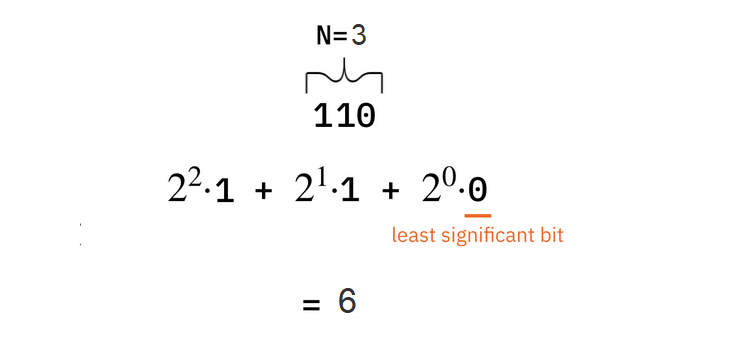
The least significant bit (qubit 0) is the rightmost bit in the bitstrings.

## *Executing the circuit on a real device*

In [ ]:
from qiskit import IBMQ

# load your account
IBMQ.load_account()

# set your provider 
# provider=IBMQ.get_provider(hub='<your hub>', project='<your project>', group='<your group')

provider=IBMQ.get_provider(hub='ibm-q-internal', project='core-team', group='support')


In [ ]:
# print only the real backends of your provider and those with a number of qubits greater than 1

from qiskit import IBMQ
backends=list(filter(lambda device:device.configuration().num_qubits>1, provider.backends(simulator=False)))


In [ ]:
from qiskit.providers.ibmq import least_busy
backends = list(filter(lambda device:device.configuration().num_qubits>1, provider.backends(simulator=False)))
backend = least_busy(backends)
print('The least busy backend is: ', backend.name())

# start a job on the backend
job = execute(circuit, backend, shots=1000)

# monitor the job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

# collect the job results and display them
result = job.result()
counts = result.get_counts(circuit)
print(counts)

In [ ]:
plot_histogram(counts)

## *Now it's your turn to play!*  - *First Challenge*
<div class="alert alert-block alert-info">
<b>Note:</b>
Here's the first challenge for you: In the following cells, create a GHZ (Greenberger, Horne and Zeilinger) circuit, to produce a three maximally entangled quantum states 
</div>

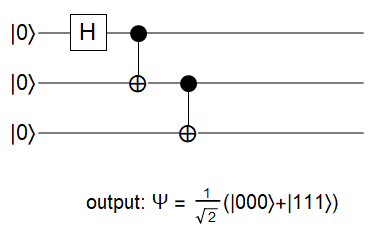

In [ ]:
# Create the QuantumCircuit "qhz" 

                 
# Add gates 


# Add measure (all qubits)


# Draw the circuit 


In [ ]:
# execute your circuit using your primary backend "ibmq_montreal" 


# monitor the job 


# collect the job results and display them


# *Circuits operations*

## *Addition of circuits*
You can combine differents circuits into one. But they have to share the same amount of registers

In [ ]:
# You can combine differents circuits into one. 

circuit1 = QuantumCircuit(3,3)
circuit1.h(0)
circuit1.x(1)

circuit2 = QuantumCircuit(3,3)
circuit2.cx(0,2)

circuit3 = QuantumCircuit(3,3)
circuit3.measure(range(3),range(3))

full_circuit=circuit1+circuit2+circuit3

# draw the circuits 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].set_title('Circuit 1')
ax[1].set_title('Circuit 2')
circuit1.draw(output='mpl',scale=1.2, ax=ax[0])
circuit2.draw(output='mpl',scale=1.7, ax=ax[1])


In [ ]:
# draw the circuits 
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].set_title('Measure Circuit')
ax[1].set_title('Full Circuit')
circuit3.draw(output='mpl',scale=1.2, ax=ax[0])
full_circuit.draw(output='mpl', scale=1.5, ax=ax[1])

## *Compose circuit with ``other`` circuit or instruction*

In [ ]:
# It's possible to compose circuits in qiskit
big_circ=QuantumCircuit(4)
big_circ.h(0)
big_circ.x(2)
big_circ.cx(0,1)
big_circ.cx(2,3)


sub_circ = QuantumCircuit(3, name='sub_circ') #The second circuit must have the same or less amount of qubits
sub_circ.h(0)
sub_circ.ccx(0,1,2)
sub_circ.barrier()
sub_circ.id(1)
sub_circ.u3(np.pi, np.pi/2, np.pi/8, 0)

fig, ax = plt.subplots(nrows=1, ncols=2)
big_circ.draw(output='mpl', ax=ax[0])
sub_circ.draw(output='mpl',scale=1.6, ax=ax[1])


##  *We compose a full circuit from the big_circ and the sub_circ circuits*

In [ ]:
full_circ = big_circ.compose(sub_circ, [1,2,3]) # specify which qubits in the big circuit to add the sub circuit

full_circ.draw(output='mpl')

##  *We can also create a circuit by appending directly a circuit to an existing one*

In [ ]:
# You can also append directly the sub circuit to the big circuit
big_circ.append(sub_circ, [1,2,3])

big_circ.draw(output='mpl')

##  *You can visualize the overall circuit gates by decomposing it*

In [ ]:
# To visualize the full circuit you have to decompose it
# note the decomposition of the Hadamard and Not gates into U2 and U3 gates
big_circ.decompose().draw(output='mpl')

## *Create a composite gate from a quantum circuit*

In [ ]:
# Consider that circuit
from qiskit import QuantumCircuit

circ=QuantumCircuit(2)
circ.h(0)
circ.x(1)

# create a gate out of that circuit. 
myGate = circ.to_gate()

# This gate can then be added to a Quantum circuit

## *Create a gate from a unitary matrix*

In [ ]:
import scipy
import numpy
import qiskit
from qiskit.extensions import UnitaryGate

A = numpy.array([[2, 1, 1, 1], [1, 2, 1, 1], [1, 1, 2, 1], [1, 1, 1, 2]])
U = scipy.linalg.expm(1j * A)

# create my unitary gate
my_unitary_gate = UnitaryGate(U, "my_unitary_gate")

# let's add that unitary gate to a Quantumcircuit and print it 
circuit = QuantumCircuit(my_unitary_gate.num_qubits)
circuit.append((my_unitary_gate), list(range(my_unitary_gate.num_qubits)))
circuit.draw(output='mpl', scale=1)

In [ ]:
# We can decompose that gate into basis gates 
circuit.decompose().draw(output='mpl')

In [ ]:
# Another way to add a gate from a Unitary matrix to a circuit
qubits = [2,3]
my_circuit = QuantumCircuit(4)
my_circuit.unitary(U,qubits,label="my_unitary_gate") # my_circuit.unitary(obj, qubits, label=None)
my_circuit.draw(output='mpl')

In [ ]:
my_circuit.decompose().draw(output='mpl', idle_wires=False)

## *Now it's your turn to play!* - *Second challenge*
<div class="alert alert-block alert-info">
<b>Note:</b>
Here's the second challenge for you: Qiskit Terra gives the possibility to create a unitary gate out of a quantum circuit. The result is then a composite gate encapsulating this circuit. 
Consider the circuit below: 


  - Convert that circuit into a gate (refer to https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.to_gate.html)
  - Add that gate to a Quantum Circuit 
       - Create a new QuantumCircuit (you must create first a QuantumCircuit because you cannot draw a gate without a circuit)
       - Append the gate to your QuantumCircuit 
  - Draw that circuit 
  - Decompose that circuit one level and draw the decomposition
    
    
 </div>



In [ ]:
from qiskit import QuantumCircuit

simple_circ=QuantumCircuit(2)
simple_circ.h(0)
simple_circ.x(1)
circuit.draw(output='mpl')

In [ ]:
# Convert that circuit to a gate 



In [ ]:
# create a new QuantumCircuit and append the gate to that circuit


In [ ]:
# draw the circuit 


In [ ]:
# decompose that circuit one level and draw the decomposition


## *Now it's your turn to play!* - *Third challenge*

<div class="alert alert-block alert-info">
<b>Note:</b>
Here's the third challenge for you: Qiskit Terra gives the possibility to create a unitary "controlled gate" from a circuit. 

  - Convert the circuit (simple_circ) into a controlled gate (refer to https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.to_gate.html)
  - Add that controlled gate to a Quantum Circuit 
       - Create a new QuantumCircuit (you must create first a QuantumCircuit because you cannot draw a gate without a circuit)
       - Append the controlled gate to your QuantumCircuit 
  - Draw that circuit 
  - Decompose the circuit one level and draw the decomposition 

In [ ]:
# create a controlled gate from the circuit (simple_circ)



In [ ]:
# create a new QuantumCircuit and append the controlled gate to it 



In [ ]:
# draw the QuantumCircuit 



In [ ]:
# decompose one level that circuit and draw the decomposition 


# Challenges Solutions
<div class="alert alert-success">
<b>First Challenge solution</b>


In [ ]:
# Create the QuantumCircuit "qhz" 
qc = QuantumCircuit(3,3)

# Add gates 
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

# Add measure (all qubits)
qc.measure_all()

# Draw the circuit 
qc.draw(output='mpl')


In [ ]:
# execute your circuit using your primary backend "ibmq_montreal" 
from qiskit import IBMQ
IBMQ.load_account() # Load your account from disk

provider = IBMQ.get_provider(hub='ibm-q-internal', project='core-team', group='support')
backend = provider.backends.ibmq_montreal 

job = execute(qc, backend, shots=1000)

# monitor the job
from qiskit.tools.monitor import job_monitor
job_monitor(job)



In [ ]:
# collect the job results and display them
result = job.result()

counts = result.get_counts()

plot_histogram(counts)

<div class="alert alert-success">
<b>Second Challenge solution</b>


In [ ]:
# Convert the circuit to gate

my_gate=simple_circ.to_gate()

print(type(my_gate))

In [ ]:
# To draw the gate you must create a QuantumCircuit. 
my_circuit = QuantumCircuit(2)

# add the gate to your circuit
my_circuit.append(my_gate, [0,1])

# draw your circuit
my_circuit.draw()

In [ ]:
my_circuit.decompose().draw()

<div class="alert alert-success">
<b>Third Challenge solution</b>


In [ ]:
# create a controlled gate from the original circuit 
my_controlled_gate=simple_circ.to_gate().control()

# create a new circuit and append it the controlled gate
my_controlled_circ = QuantumCircuit(3,3)

my_controlled_circ.append(my_controlled_gate,[0,1,2]) # first qubit is the control

my_controlled_circ.draw()



In [ ]:
# decompose to standard gates
my_controlled_circ.decompose().draw()